In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import shared

ve_or_ju = "ve"

In [2]:
running_order = pd.read_csv(f'data/running_order_j2019_{ve_or_ju}.tsv', delimiter="\t")
display(running_order.shape)

(6759, 7)

In [3]:
running_order["leg_nro"] = running_order["leg"]
running_order["orig_name"] = running_order["name"]
running_order["name"] = running_order["name"].str.lower()

In [4]:
running_order.head()

,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson
4,2,Göteborg Majorna OK 1,Göteborg Majorna OK,SWE,1,6.0,amanda hansson,1,Amanda Hansson


In [5]:
predictions_and_history = pd.read_csv(f"data/simple_preds_for_runners_with_history_14062019_{ve_or_ju}.csv", delimiter="\t")
display(predictions_and_history.shape)
predictions_and_history.head()

(15019, 12)

,Unnamed: 0,mean_team_id,num_valid_times,mean_pace,stdev,log_stdev,prior_mean,prior_log_std,predicted_log_pace_mean,predicted_log_pace_std,name,teams
0,0,14.5,4,6.6108,0.3563,0.0526,6.9516,0.0996,1.8873,0.0526,anna mårsell,STORA TUNA OK
1,1,27.0,7,7.1139,0.5656,0.0824,6.9286,0.1088,1.9587,0.0824,magdalena olsson,IFK MORAS OK;STORA TUNA OK
2,2,3.0,1,5.9440,0.0000,0.0000,7.1268,0.1570,1.7824,0.0000,julia jakob,STORA TUNA OK
3,3,10.0,7,6.0373,0.3487,0.0565,6.9272,0.1200,1.7963,0.0565,tove alexandersson,STORA TUNA OK
4,4,61.0,3,7.3283,0.8452,0.1119,7.9845,0.1061,1.9854,0.1119,lisa holer,GÖTEBORG MAJORNA OK;EKSJÖ SOK


In [6]:

predictions_and_history["num_runs"] = predictions_and_history["num_valid_times"]
no_history_row = pd.DataFrame([[0, 0, 0]], columns=["predicted_log_pace_mean", "predicted_log_pace_std", "num_valid_times"])
def get_history_and_preds(running_order_row):
    history_row = shared.get_matching_history_row_for_runner(running_order_row, predictions_and_history, no_history_row)
    #print(f"estimate_row log_means {history_row.log_means} {history_row.log_stdevs}")
    pred_log_mean = history_row.predicted_log_pace_mean.values[0]
    pred_log_std = history_row.predicted_log_pace_std.values[0]
    num_valid_times = history_row.num_valid_times.values[0]
    return pd.Series({"pred_log_mean": pred_log_mean, "pred_log_std": pred_log_std, "num_valid_times": num_valid_times})

history_and_preds = running_order.apply(lambda row: get_history_and_preds(row), axis=1)
running_order = running_order.assign(num_runs = history_and_preds.num_valid_times)
running_order = running_order.assign(pred_log_mean = history_and_preds.pred_log_mean)
running_order = running_order.assign(pred_log_std = history_and_preds.pred_log_std)



Found 1 history with switched name evely kaasiku 
Found 1 history with switched name johanna hulkkonen 
Found 1 history with switched name miia niittynen 
Found 3 history with switched name svetlana mironova 
Found 1 history with switched name karoliina ukskoski 
Found 1 history with switched name marjo taanila 
Found 1 history with switched name ulrika uotila 
Found 1 history with switched name zhanalova barbora 
Found 1 history with switched name nymark tora 
Found 1 history with switched name boman monica 
Found 1 history with switched name oikarinen anni 
name 'sanna timonen' team_name 'MAASOTAKOULU LPR'
by_name 0 by_name_and_colon 5 runners 2
Duplicate runner       Unnamed: 0  mean_team_id  num_valid_times  mean_pace  stdev  log_stdev  \
7156        7156         501.0                1     13.403    0.0        0.0   
7159        7159         777.0                1     10.631    0.0        0.0   

      prior_mean  prior_log_std  predicted_log_pace_mean  \
7156     10.9190         0

In [7]:
history_and_preds.head()

,pred_log_mean,pred_log_std,num_valid_times
0,1.8857,0.0000,1.0
1,1.9587,0.0824,7.0
2,1.7824,0.0000,1.0
3,1.7963,0.0565,7.0
4,2.0053,0.0358,2.0


In [8]:

(top_countries, top_first_names) = shared.read_persisted_dummy_column_values(ve_or_ju)

In [9]:
features = shared.preprocess_features(running_order, top_countries, ve_or_ju)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6759 entries, 0 to 6758
Data columns (total 12 columns):
team_id           6759 non-null int64
team              6759 non-null object
team_base_name    6759 non-null object
team_country      6759 non-null object
leg               6759 non-null int64
leg_dist          6759 non-null float64
name              6759 non-null object
leg_nro           6759 non-null int64
orig_name         6759 non-null object
num_runs          6759 non-null float64
pred_log_mean     6725 non-null float64
pred_log_std      6725 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 633.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 4 columns):
first_name           974 non-null object
mean_pace_count      975 non-null int64
fn_pace_class        975 non-null int64
fn_pace_std_class    975 non-null int64
dtypes: int64(3), object(1)
memory usage: 30.6+ KB


None

[]

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6759 entries, 0 to 6758
Data columns (total 41 columns):
team_id                  -6759 non-null int64
team_id_log10            -6759 non-null float64
team_id_square           -6759 non-null int64
leg_1                    -6759 non-null Sparse[uint8, 0]
leg_2                    -6759 non-null Sparse[uint8, 0]
leg_3                    -6759 non-null Sparse[uint8, 0]
leg_4                    -6759 non-null Sparse[uint8, 0]
c_EST                    -6759 non-null Sparse[uint8, 0]
c_FIN                    -6759 non-null Sparse[uint8, 0]
c_GBR                    -6759 non-null Sparse[uint8, 0]
c_LAT                    -6759 non-null Sparse[uint8, 0]
c_NOR                    -6759 non-null Sparse[uint8, 0]
c_OTHER                  -6759 non-null Sparse[uint8, 0]
c_RUS                    -6759 non-null Sparse[uint8, 0]
c_SUI                    -6759 non-null Sparse[uint8, 0]
c_SWE                    -6759 non-null Sparse[uint8, 0]
runs_1.0    

In [11]:

#gbr_sd_estimate = shared.predict_without_history(features)
gbr_sd_estimate = shared.predict_without_history(features, ve_or_ju)

,log_q_low,predicted,log_q_high,log_std
0,1.861,7.209,2.084,0.111
1,1.814,6.642,2.010,0.098
2,1.796,6.990,2.105,0.154
3,1.799,6.618,1.991,0.096
4,1.860,6.939,2.032,0.086
5,1.807,6.873,2.027,0.110
6,1.785,6.877,2.073,0.144
7,1.840,7.339,2.013,0.086
8,1.856,6.892,2.016,0.080
9,1.813,6.608,2.004,0.096


0.17501892910330646

In [12]:
running_order["predicted"] = gbr_sd_estimate["predicted"]
running_order["log_q_low"] = gbr_sd_estimate["log_q_low"]
running_order["log_q_high"] = gbr_sd_estimate["log_q_high"]
running_order["log_std"] = gbr_sd_estimate["log_std"]


In [13]:
running_order.head()

,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name,num_runs,pred_log_mean,pred_log_std,predicted,log_q_low,log_q_high,log_std
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg,1.0,1.8857,0.0000,7.209309,1.860841,2.083642,0.111400
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson,7.0,1.9587,0.0824,6.641782,1.814416,2.009966,0.097775
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob,1.0,1.7824,0.0000,6.989511,1.796061,2.104793,0.154366
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson,7.0,1.7963,0.0565,6.618147,1.799499,1.991288,0.095895
4,2,Göteborg Majorna OK 1,Göteborg Majorna OK,SWE,1,6.0,amanda hansson,1,Amanda Hansson,2.0,2.0053,0.0358,6.939422,1.859515,2.032438,0.086461


In [14]:
running_order["log_std"].describe(percentiles=[0.01, 0.05, .25, .5, .75, .95, .99])

count    6759.000000
mean        0.175019
std         0.034479
min         0.006586
1%          0.089751
5%          0.116020
25%         0.151953
50%         0.175901
75%         0.198723
95%         0.229959
99%         0.249246
max         0.359724
Name: log_std, dtype: float64

In [15]:
running_order["log_std_fixed"] = running_order["log_std"]
#running_order["log_std_fixed"] = np.clip(running_order["log_std"], 0.1, 0.5)
#running_order["log_std"].values[running_order["log_std"].values < 0] = 0.1

In [16]:
#def select_final_ind_preds(row):
#    return pd.Series({"pred_log_mean": pred_log_mean, "pred_log_std": pred_log_std, "num_valid_times": num_valid_times})
    
    
#final_ind_preds = running_order.apply(lambda row: select_final_ind_preds(row), axis=1)

running_order["final_pace_mean"] = np.log(running_order["predicted"])
running_order["final_pace_std"] = running_order["log_std"]
use_predicted_mean = running_order["num_runs"].values >= 1
running_order["final_pace_mean"].values[use_predicted_mean] = running_order["pred_log_mean"].values[use_predicted_mean]
use_predicted_std = running_order["num_runs"].values >= 4
running_order["final_pace_std"].values[use_predicted_std] = running_order["pred_log_std"].values[use_predicted_std]

# remove extremes from unknown runners predictions
unknown_runners = running_order["num_runs"].values < 1
running_order["final_pace_mean"].values[unknown_runners] = np.clip(running_order["final_pace_mean"].values[unknown_runners], np.log(7), np.log(15))
running_order["final_pace_std"].values[unknown_runners] = np.clip(running_order["final_pace_std"].values[unknown_runners], np.log(1.2), np.log(1.5))

# remove extremes from all runners
running_order["final_pace_mean"] = np.clip(running_order["final_pace_mean"].values, np.log(5.6), np.log(18))
running_order["final_pace_std"] = np.clip(running_order["final_pace_std"], np.log(1.07), np.log(1.6))


running_order.head().round(3)


,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name,num_runs,pred_log_mean,pred_log_std,predicted,log_q_low,log_q_high,log_std,log_std_fixed,final_pace_mean,final_pace_std
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg,1.0,1.886,0.000,7.209,1.861,2.084,0.111,0.111,1.886,0.111
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson,7.0,1.959,0.082,6.642,1.814,2.010,0.098,0.098,1.959,0.082
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob,1.0,1.782,0.000,6.990,1.796,2.105,0.154,0.154,1.782,0.154
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson,7.0,1.796,0.056,6.618,1.799,1.991,0.096,0.096,1.796,0.068
4,2,Göteborg Majorna OK 1,Göteborg Majorna OK,SWE,1,6.0,amanda hansson,1,Amanda Hansson,2.0,2.005,0.036,6.939,1.860,2.032,0.086,0.086,2.005,0.086


In [17]:
np.exp(running_order[["final_pace_mean", "final_pace_std"]]).describe(percentiles=[0.01, 0.02, 0.05, 0.1, .25, .5, .75, .9, .95, .99])


,final_pace_mean,final_pace_std
count,6759.000000,6759.000000
mean,11.637386,1.172052
std,2.606394,0.057702
min,5.872615,1.070000
1%,6.821463,1.070000
2%,7.034510,1.070000
5%,7.532274,1.070000
10%,8.204477,1.086868
25%,9.643306,1.122661
50%,11.527091,1.186494


In [18]:
running_order.to_csv(f"data/running_order_2019_with_estimates_{ve_or_ju}.tsv", "\t")

In [19]:
running_order[
    ['num_runs', 'pred_log_mean', "pred_log_std", "predicted", "log_std_fixed", "final_pace_mean", "final_pace_std"]
].groupby('num_runs').agg(["mean"]).round(2)



,pred_log_mean,pred_log_std,predicted,log_std_fixed,final_pace_mean,final_pace_std
,mean,mean,mean,mean,mean,mean
num_runs,,,,,,
0.0,0.00,0.00,12.54,0.18,2.50,0.20
1.0,2.46,0.00,12.28,0.19,2.46,0.19
2.0,2.46,0.07,11.93,0.17,2.46,0.17
3.0,2.42,0.09,11.73,0.18,2.42,0.18
4.0,2.41,0.10,11.56,0.17,2.41,0.11
5.0,2.39,0.11,11.30,0.17,2.39,0.11
6.0,2.35,0.11,11.19,0.16,2.35,0.11
7.0,2.34,0.11,10.91,0.17,2.34,0.11


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.scatterplot(x="team_id", y=np.exp(running_order.final_pace_mean), hue="num_runs", data=running_order)


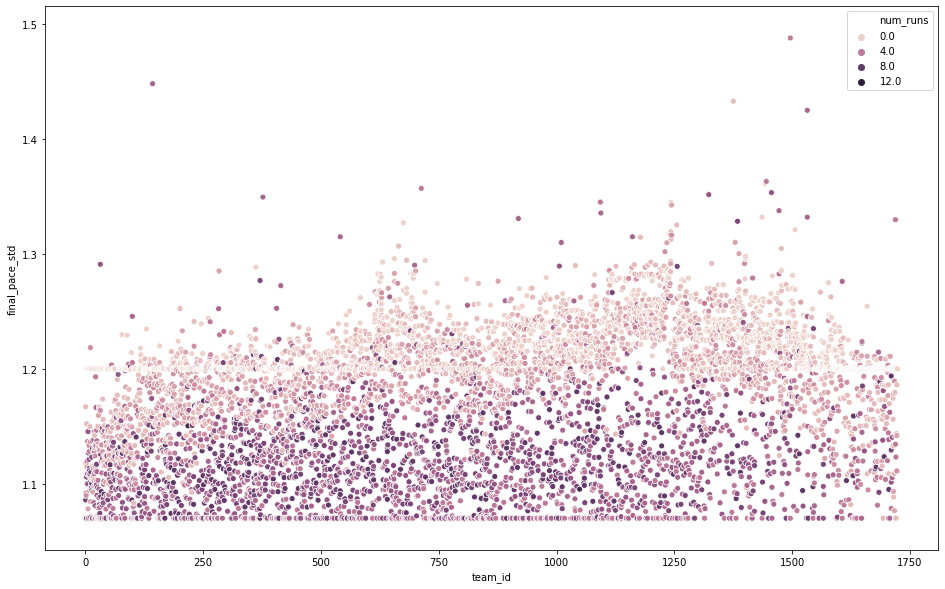

In [21]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x="team_id", y=np.exp(running_order.final_pace_std), hue="num_runs", data=running_order)
